In [106]:
import tensorflow as tf

In [107]:
print(tf.__version__)

2.10.0


In [108]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [109]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_Intro', inputs=generated_inputs, targets=generated_targets)

In [110]:
training_data = np.load('TF_Intro.npz')

In [111]:
input_size = 2
output_size = 1

#unlike other packages that have built-in models, we must built the model in TF
#.Sequential() -> specifies how the model will be laid down, args -> ('stacks layers')
#takes inputs, applies linear transformation and provides outputs

model = tf.keras.Sequential([
                    tf.keras.layers.Dense(output_size,
                         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                         bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                    )
    #takes the inputs provided to the model, calculates the dot product of inputs and the weights and adds the bias
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
#stochastic gradient descent optimizers, including support for learning rate, momentum, decay, etc.
#normally optimizer = 'sgd' sets the learning_rate by it self automatically but when we want it we can do it manually

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
#configures the model for training
#optimzer = optimization algorithm
#SGD -> stochastic gradient descent
#for settings see the website of TF2, Module: tf.keras.optimizers

#loss function: L2 norm known as least sum of squares but a scaled one
#lucky us, TF arrange that for us
#normally we don't deal with 'loss' parameter, it's hard to handle

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)
#epoch: iteration over the full dataset, more is lower loss function and better accuracy

#verbose -> arrange the behaviour of model, verbose=0 means silent, no output about the training is displayed
#verbose=1 -> progress bar
#verbose=2 -> one line per epoch

Epoch 1/100
32/32 - 0s - loss: 28.9555 - 195ms/epoch - 6ms/step
Epoch 2/100
32/32 - 0s - loss: 4.3348 - 17ms/epoch - 524us/step
Epoch 3/100
32/32 - 0s - loss: 1.4113 - 16ms/epoch - 499us/step
Epoch 4/100
32/32 - 0s - loss: 0.6350 - 15ms/epoch - 470us/step
Epoch 5/100
32/32 - 0s - loss: 0.4132 - 15ms/epoch - 481us/step
Epoch 6/100
32/32 - 0s - loss: 0.3558 - 15ms/epoch - 467us/step
Epoch 7/100
32/32 - 0s - loss: 0.3388 - 14ms/epoch - 452us/step
Epoch 8/100
32/32 - 0s - loss: 0.3377 - 16ms/epoch - 489us/step
Epoch 9/100
32/32 - 0s - loss: 0.3393 - 15ms/epoch - 454us/step
Epoch 10/100
32/32 - 0s - loss: 0.3382 - 15ms/epoch - 469us/step
Epoch 11/100
32/32 - 0s - loss: 0.3324 - 15ms/epoch - 469us/step
Epoch 12/100
32/32 - 0s - loss: 0.3362 - 16ms/epoch - 500us/step
Epoch 13/100
32/32 - 0s - loss: 0.3401 - 16ms/epoch - 500us/step
Epoch 14/100
32/32 - 0s - loss: 0.3395 - 16ms/epoch - 487us/step
Epoch 15/100
32/32 - 0s - loss: 0.3352 - 16ms/epoch - 486us/step
Epoch 16/100
32/32 - 0s - loss: 0.

In [112]:
model.layers[0].get_weights()
#model is our model that we created
#layer specify the layer we are interested in
#this gives us tensor with two arrays

[array([[ 1.9956535],
        [-2.994269 ]], dtype=float32),
 array([5.017093], dtype=float32)]

In [113]:
weights = model.layers[0].get_weights()[0]

In [114]:
bias = model.layers[0].get_weights()[1]

In [115]:
#making predictions
a = model.predict_on_batch(training_data['inputs']).round(1)
a

array([[  4. ],
       [ 24.4],
       [ 38.7],
       [ 16.3],
       [-33. ],
       [-14.1],
       [  0.7],
       [-14.2],
       [-23.7],
       [ -3.3],
       [ -2.6],
       [  9.9],
       [ 11.7],
       [-37.5],
       [ 46.2],
       [ -7. ],
       [ 40.1],
       [-30.8],
       [ -8.4],
       [ 17.8],
       [-25.9],
       [-11.1],
       [  1.3],
       [ -0.3],
       [-16.8],
       [  7.5],
       [ 47.9],
       [ 12.3],
       [-32.9],
       [-21.7],
       [-33. ],
       [-29. ],
       [  8.5],
       [  1.4],
       [ -6.5],
       [-31.8],
       [ 22. ],
       [ 18.7],
       [ 17.2],
       [-21.8],
       [-35.2],
       [ 19.4],
       [ 26.5],
       [ 29.9],
       [  7.5],
       [ -7.5],
       [  7.8],
       [ -0.6],
       [-11.2],
       [-27.1],
       [ 18.3],
       [ 11.9],
       [ 23.7],
       [ 14.2],
       [ 30.7],
       [-17. ],
       [ 19.3],
       [ 44.4],
       [ -2.6],
       [ 16.5],
       [  3.6],
       [-25.4],
       [

In [116]:
b = training_data['targets'].round(1)
b

array([[  3.5],
       [ 23.4],
       [ 37.9],
       [ 16.3],
       [-33.9],
       [-13.5],
       [  0.1],
       [-13.6],
       [-24.2],
       [ -3.2],
       [ -3. ],
       [ 10.7],
       [ 11.5],
       [-38.5],
       [ 46.2],
       [ -7.9],
       [ 40.1],
       [-31.4],
       [ -8. ],
       [ 17.7],
       [-25.3],
       [-12.1],
       [  2.1],
       [  0.1],
       [-17.8],
       [  7. ],
       [ 47.9],
       [ 12.9],
       [-33.1],
       [-21.5],
       [-33.7],
       [-29.3],
       [  8. ],
       [  2.3],
       [ -5.9],
       [-31.8],
       [ 21.1],
       [ 18.5],
       [ 17.9],
       [-21.9],
       [-35.2],
       [ 19.7],
       [ 26.7],
       [ 29.1],
       [  6.9],
       [ -8.3],
       [  8.2],
       [  0.2],
       [-11.5],
       [-26.4],
       [ 19. ],
       [ 11.1],
       [ 24.5],
       [ 14.8],
       [ 30.7],
       [-17.2],
       [ 18.4],
       [ 43.4],
       [ -3.1],
       [ 16.5],
       [  4.6],
       [-25.4],
       [

In [117]:
c = b-a
c.round(1)

array([[-0.5],
       [-1. ],
       [-0.8],
       [ 0. ],
       [-0.9],
       [ 0.6],
       [-0.6],
       [ 0.6],
       [-0.5],
       [ 0.1],
       [-0.4],
       [ 0.8],
       [-0.2],
       [-1. ],
       [-0. ],
       [-0.9],
       [ 0. ],
       [-0.6],
       [ 0.4],
       [-0.1],
       [ 0.6],
       [-1. ],
       [ 0.8],
       [ 0.4],
       [-1. ],
       [-0.5],
       [-0. ],
       [ 0.6],
       [-0.2],
       [ 0.2],
       [-0.7],
       [-0.3],
       [-0.5],
       [ 0.9],
       [ 0.6],
       [-0. ],
       [-0.9],
       [-0.2],
       [ 0.7],
       [-0.1],
       [ 0. ],
       [ 0.3],
       [ 0.2],
       [-0.8],
       [-0.6],
       [-0.8],
       [ 0.4],
       [ 0.8],
       [-0.3],
       [ 0.7],
       [ 0.7],
       [-0.8],
       [ 0.8],
       [ 0.6],
       [-0. ],
       [-0.2],
       [-0.9],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 1. ],
       [-0. ],
       [-0.2],
       [-0.9],
       [-0.1],
       [ 0.9],
       [-0

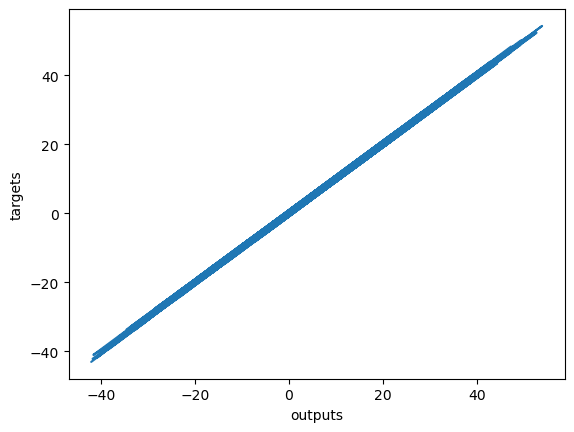

In [118]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()